In [1]:
import json

In [2]:
dict1=json.load(open('/content/product_summaries.json','r'))

In [ ]:
dict1['Capital goods']

In [4]:
cap_goods=dict1['Capital goods']

In [ ]:
cap_goods

In [9]:
summary=dict()

In [10]:
for i in range(len(cap_goods)):
  if cap_goods[i][2]=='1993' and cap_goods[i][3]=='Import':
    if cap_goods[i][0] in summary:
      summary[cap_goods[i][0]]=summary[cap_goods[i][0]]+float(cap_goods[i][5])
    else:
      summary[cap_goods[i][0]]=float(cap_goods[i][5])

In [11]:
summary

{'United Arab Emirates': 1783.41,
 'Argentina': 7021.14,
 'Australia': 15854.63,
 'Burundi': 50.73,
 'Bangladesh': 525.84,
 'Belize': 65.23,
 'Bolivia': 479.58,
 'Brazil': 8360.95,
 'Brunei': 828.36,
 'Bhutan': 28.76,
 'Central African Republic': 40.05,
 'Canada': 55566.74,
 'Switzerland': 14683.51,
 'Chile': 3931.37,
 'China': 41524.07,
 'Congo, Rep.': 131.18,
 'Colombia': 3436.21,
 'Cyprus': 555.58,
 'Czech Republic': 4365.63,
 'Germany': 85012.17,
 'Dominica': 14.3,
 'Denmark': 7699.05,
 'Algeria': 2665.03,
 '': 891678.41,
 'Ecuador': 980.34,
 'Spain': 23111.74,
 'Finland': 5586.92,
 'Gabon': 291.27,
 'United Kingdom': 66306.15,
 'Greece': 5859.63,
 'Grenada': 20.92,
 'Guatemala': 732.44,
 'Hong Kong, China': 36953.85,
 'Croatia': 992.29,
 'Hungary': 3119.47,
 'Indonesia': 11831.05,
 'India': 4466.91,
 'Ireland': 7362.05,
 'Iceland': 328.34,
 'Jamaica': 410.34,
 'Japan': 37138.47,
 'St. Kitts and Nevis': 24.42,
 'Korea, Rep.': 30158.55,
 'St. Lucia': 52.76,
 'Sri Lanka': 782.12,
 'M

In [14]:
labels=[]
sizes=[]

In [15]:
for x in summary:
  if len(x)>0 and x.strip()!='World':
    labels.append(x)
    sizes.append(summary[x])

In [17]:
len(labels)

68

In [18]:
len(sizes)

68

In [19]:
import matplotlib.pyplot as plt


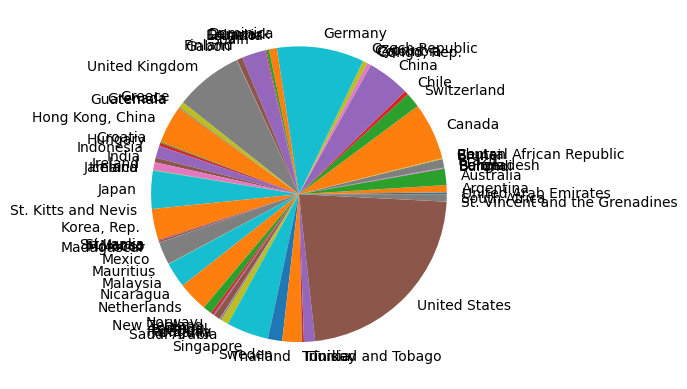

In [22]:
fig,ax=plt.subplots()
ax.pie(sizes,labels=labels)
plt.show()

In [24]:
pip install squarify

In [25]:
import squarify

In [28]:
import seaborn as sb

(0.0, 100.0, 0.0, 100.0)

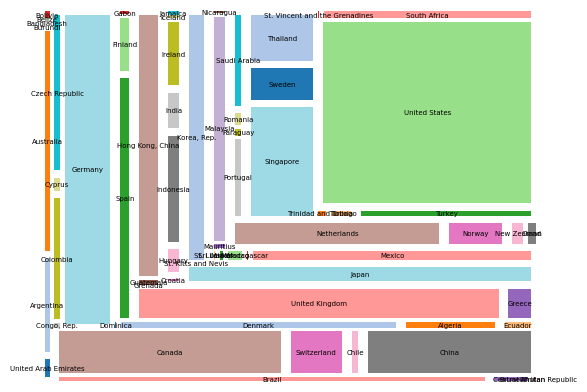

In [31]:
squarify.plot(sizes=sizes,label=labels,color=sb.color_palette("tab20", len(sizes)), pad=1, text_kwargs={'fontsize': 5})
plt.axis('off')

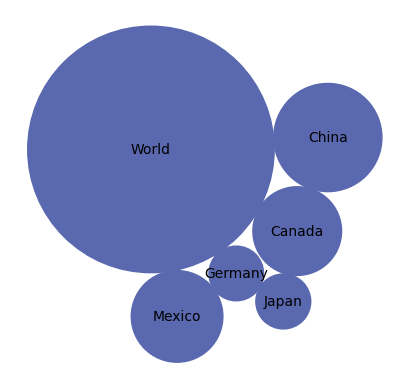

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df=pd.read_csv('/content/en_USA_AllYears_WITS_Trade_Summary.CSV')
countries=[]
values=[]
colors=[]
summary_curr=dict()
for index in df.index:
  if df['2021'][index]!=None and pd.notnull(df['2021'][index]) and df['Indicator Type'][index]=='Import' and (df['Indicator'][index]=='Import(US$ Mil)' or df['Indicator'][index]=='Trade (US$ Mil)-Top 5 Import Partner'):
    if df['Partner'][index] in summary_curr:
      summary_curr[df['Partner'][index]]=summary_curr[df['Partner'][index]]+float(df['2021'][index])
    else:
      summary_curr[df['Partner'][index]]=float(df['2021'][index])

for x in summary_curr:
  countries.append(x)
  values.append(summary_curr[x])
  colors.append('#5A69AF')

browser_market_share = {
    'browsers': countries,
    'market_share': values,
    'color': colors
}




class BubbleChart:
    def __init__(self, area, bubble_spacing=0):
        """
        Setup for bubble collapse.

        Parameters
        ----------
        area : array-like
            Area of the bubbles.
        bubble_spacing : float, default: 0
            Minimal spacing between bubbles after collapsing.

        Notes
        -----
        If "area" is sorted, the results might look weird.
        """
        area = np.asarray(area)
        r = np.sqrt(area / np.pi)

        self.bubble_spacing = bubble_spacing
        self.bubbles = np.ones((len(area), 4))
        self.bubbles[:, 2] = r
        self.bubbles[:, 3] = area
        self.maxstep = 2 * self.bubbles[:, 2].max() + self.bubble_spacing
        self.step_dist = self.maxstep / 2

        # calculate initial grid layout for bubbles
        length = np.ceil(np.sqrt(len(self.bubbles)))
        grid = np.arange(length) * self.maxstep
        gx, gy = np.meshgrid(grid, grid)
        self.bubbles[:, 0] = gx.flatten()[:len(self.bubbles)]
        self.bubbles[:, 1] = gy.flatten()[:len(self.bubbles)]

        self.com = self.center_of_mass()

    def center_of_mass(self):
        return np.average(
            self.bubbles[:, :2], axis=0, weights=self.bubbles[:, 3]
        )

    def center_distance(self, bubble, bubbles):
        return np.hypot(bubble[0] - bubbles[:, 0],
                        bubble[1] - bubbles[:, 1])

    def outline_distance(self, bubble, bubbles):
        center_distance = self.center_distance(bubble, bubbles)
        return center_distance - bubble[2] - \
            bubbles[:, 2] - self.bubble_spacing

    def check_collisions(self, bubble, bubbles):
        distance = self.outline_distance(bubble, bubbles)
        return len(distance[distance < 0])

    def collides_with(self, bubble, bubbles):
        distance = self.outline_distance(bubble, bubbles)
        idx_min = np.argmin(distance)
        return idx_min if type(idx_min) == np.ndarray else [idx_min]

    def collapse(self, n_iterations=50):
        """
        Move bubbles to the center of mass.

        Parameters
        ----------
        n_iterations : int, default: 50
            Number of moves to perform.
        """
        for _i in range(n_iterations):
            moves = 0
            for i in range(len(self.bubbles)):
                rest_bub = np.delete(self.bubbles, i, 0)
                # try to move directly towards the center of mass
                # direction vector from bubble to the center of mass
                dir_vec = self.com - self.bubbles[i, :2]

                # shorten direction vector to have length of 1
                dir_vec = dir_vec / np.sqrt(dir_vec.dot(dir_vec))

                # calculate new bubble position
                new_point = self.bubbles[i, :2] + dir_vec * self.step_dist
                new_bubble = np.append(new_point, self.bubbles[i, 2:4])

                # check whether new bubble collides with other bubbles
                if not self.check_collisions(new_bubble, rest_bub):
                    self.bubbles[i, :] = new_bubble
                    self.com = self.center_of_mass()
                    moves += 1
                else:
                    # try to move around a bubble that you collide with
                    # find colliding bubble
                    for colliding in self.collides_with(new_bubble, rest_bub):
                        # calculate direction vector
                        dir_vec = rest_bub[colliding, :2] - self.bubbles[i, :2]
                        dir_vec = dir_vec / np.sqrt(dir_vec.dot(dir_vec))
                        # calculate orthogonal vector
                        orth = np.array([dir_vec[1], -dir_vec[0]])
                        # test which direction to go
                        new_point1 = (self.bubbles[i, :2] + orth *
                                      self.step_dist)
                        new_point2 = (self.bubbles[i, :2] - orth *
                                      self.step_dist)
                        dist1 = self.center_distance(
                            self.com, np.array([new_point1]))
                        dist2 = self.center_distance(
                            self.com, np.array([new_point2]))
                        new_point = new_point1 if dist1 < dist2 else new_point2
                        new_bubble = np.append(new_point, self.bubbles[i, 2:4])
                        if not self.check_collisions(new_bubble, rest_bub):
                            self.bubbles[i, :] = new_bubble
                            self.com = self.center_of_mass()

            if moves / len(self.bubbles) < 0.1:
                self.step_dist = self.step_dist / 2

    def plot(self, ax, labels, colors):
        """
        Draw the bubble plot.

        Parameters
        ----------
        ax : matplotlib.axes.Axes
        labels : list
            Labels of the bubbles.
        colors : list
            Colors of the bubbles.
        """
        for i in range(len(self.bubbles)):
            circ = plt.Circle(
                self.bubbles[i, :2], self.bubbles[i, 2], color=colors[i])
            ax.add_patch(circ)
            ax.text(*self.bubbles[i, :2], labels[i],
                    horizontalalignment='center', verticalalignment='center')



bubble_chart = BubbleChart(area=browser_market_share['market_share'],
                           bubble_spacing=0.1)

bubble_chart.collapse()

fig, ax = plt.subplots(subplot_kw=dict(aspect="equal"))
bubble_chart.plot(
    ax, browser_market_share['browsers'], browser_market_share['color'])
ax.axis("off")
ax.relim()
ax.autoscale_view()


plt.show()